In [1]:
#pull data from finance yahoo news using api, convert the file to json and then a list of all news for a particular stocks, for this example, tesla. 
import requests
import json
import pandas as pd
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

url = "https://yahoo-finance15.p.rapidapi.com/api/yahoo/ne/news/tsla"

headers = {
    'x-rapidapi-host': "yahoo-finance15.p.rapidapi.com",
    'x-rapidapi-key': "fe6bbed556msh5d9a20764b8f0cbp1f0d22jsnc1e17707cacf"
    }

response = requests.request("GET", url, headers=headers)
json_file = response.json()
List_of_news = json_file['item']
print(List_of_news)


[{'description': 'Stocks rose Wednesday and recovered some losses after another drop in tech names dragged the three major indices to their lowest closing level in one month on Tuesday.', 'guid': 'ddea8630-9838-326b-803e-e44269bff8a1', 'link': 'https://finance.yahoo.com/news/stock-market-news-live-september-9-2020-221507350.html?.tsrc=rss', 'pubDate': 'Wed, 09 Sep 2020 20:05:03 +0000', 'title': 'Stock market news live updates: Tech shares rebound after three days of selling; vaccine trial put on hold'}, {'description': 'Chinese electric-vehicle maker NIO’s American depositary receipts got another Buy rating Tuesday, but it wasn’t enough to overcome the tech and EV selloff on Wall Street.', 'guid': 'd02f7620-055e-3c04-82f5-e13c8ffd7a1d', 'link': 'https://finance.yahoo.com/m/d02f7620-055e-3c04-82f5-e13c8ffd7a1d/nio-stock-gets-another-buy.html?.tsrc=rss', 'pubDate': 'Wed, 09 Sep 2020 11:57:00 +0000', 'title': 'NIO Stock Gets Another Buy Rating'}, {'description': 'Dow Jones futures were in

In [2]:
#clean data, convert date into datetime format and split date with time. 
vader = SentimentIntensityAnalyzer()
result_df=pd.DataFrame()
for each_news in List_of_news:
    #each_news['pubDate']=datetime.fromisoformat(each_news['pubDate'])
    each_news['pubDate'] = datetime.strptime(each_news['pubDate'], '%a, %d %b %Y %H:%M:%S %z')
    df = pd.DataFrame(each_news, index=[0])
    df['date'] = [d.date() for d in df['pubDate']]
    scores = df['description'].apply(vader.polarity_scores).tolist()
    df_each_news = df[['date','title']]
    scores_df = pd.DataFrame(scores)

    # Join the DataFrames of the news and the list of dicts
    parsed_and_scored_news = df_each_news.join(scores_df, rsuffix='_right')
    result_df = pd.concat([result_df,parsed_and_scored_news])
    #print(scores)
    
print(result_df) 

         date                                              title    neg  \
0  2020-09-09  Stock market news live updates: Tech shares re...  0.264   
0  2020-09-09                  NIO Stock Gets Another Buy Rating  0.000   
0  2020-09-09  Dow Jones Futures Rise Despite Coronavirus Vac...  0.000   
0  2020-09-09  Elon Musk Loses Record $16.3 Billion With Wild...  0.039   
0  2020-09-08               Has the Market Made Up Its Mind Yet?  0.095   
0  2020-09-08  Plunges in Stocks to Gold Halted at Key Techni...  0.044   
0  2020-09-08  Tesla Has a &#39;Busted Growth Story,&#39; Say...  0.000   
0  2020-09-08  Tesla Sinks in Worst 1-Day Loss on GM-Nikola D...  0.052   
0  2020-09-08  Dow closes down 632 points, as tech rout leave...  0.099   
0  2020-09-08  2 reasons fears of a dot-com style tech bubble...  0.196   
0  2020-09-08  Stock Market Today: Trump&#39;s Swing at China...  0.000   
0  2020-09-08  The Nasdaq-100 Index is down 9% this month — T...  0.074   
0  2020-09-08  Tesla Stoc

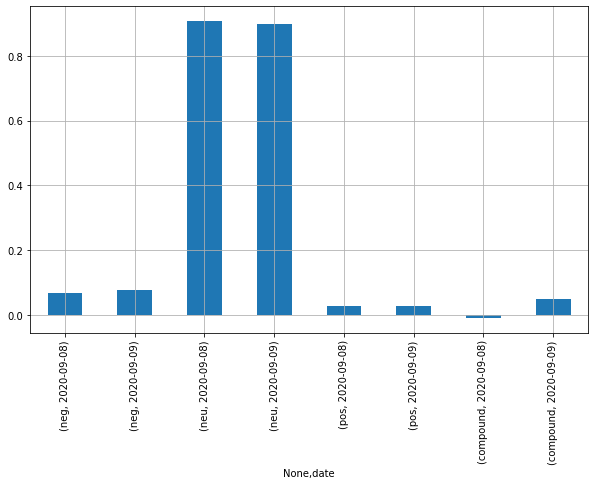

In [3]:
#visualization
plt.rcParams['figure.figsize'] = [10, 6]

# Group by date and calculate the mean
mean_scores = result_df.groupby(['date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()


# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()